<i>Status: Draft</i>

Examples
https://github.com/PacktPublishing/Graph-Machine-Learning/blob/main/Chapter01/02_Graph_metrics.ipynb

In [74]:
#!python -m pip install snap-stanford

In [75]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import mmread
import pandas as pd
from snap import LoadEdgeList, PNGraph

<b>Ref</b>: https://ogb.stanford.edu/

<b>Ref</b> https://networkrepository.com/

In [24]:
# draw a simple graph
def draw_graph(G, node_names={}, filename=None, node_size=50, layout = None):
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')
  
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
  
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
  
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  
    if filename:
        plt.savefig(os.path.join(output_dir, filename), format="png")


# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None, layout=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    
    plt.figure(figsize=(5,5),dpi=300)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')
  
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
  
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)
  
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  
    if filename:
        plt.savefig(os.path.join(output_dir, filename), format="png")

In [25]:
complete = nx.complete_graph(n = 7)

<b>Def</b>: fully connected subgraph of $n$ nodes within larger graph is referred to as a <b>clique</b> of size $n$. The process of finding cliques of a given size $n$ in a larger graph is a nondeterministic polynomial time complete (NP-complete) problem

<b>Observe</b>: Other types of graphs, some with clique subgraphs: 

- complete graph where all nodes are connected
- lollipop graph with clique of size $n$ and branch of $m$ nodes
- barbell graph with two cliques of $m1$ and branch $m2$ 

In [26]:
complete = nx.complete_graph(n = 7)
lollipop = nx.lollipop_graph(m = 7, n = 3)
barbell = nx.barbell_graph(m1 = 7, m2 = 4)

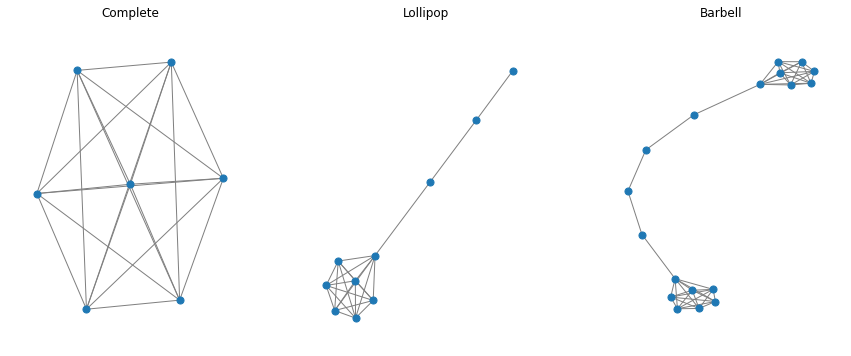

In [27]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
draw_graph(complete)
plt.title("Complete")
plt.subplot(1,3,2)
plt.title("Lollipop")
draw_graph(lollipop)
plt.subplot(1,3,3)
plt.title("Barbell")
draw_graph(barbell)

<b>Observe</b>: It is possible to join nodes

In [33]:
def get_random_node(graph):
    return np.random.choice(graph.nodes)

allGraphs = nx.compose_all([complete, barbell, lollipop])
allGraphs.add_edge(get_random_node(lollipop), get_random_node(lollipop))
allGraphs.add_edge(get_random_node(complete), get_random_node(barbell))

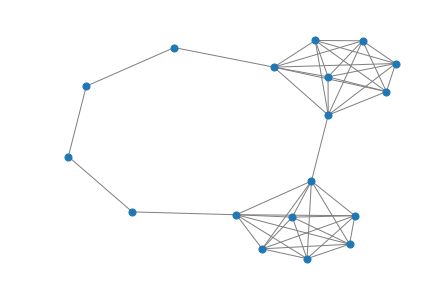

In [34]:
draw_graph(allGraphs, layout=nx.kamada_kawai_layout)

<b>Observe</b>: Graphs can be generated via probabilistic models. For example, Watts and Strogatz (1998) or Barabasi-Albert (1999) which links new nodes to existing node degrees


<b>Observe</b> Watts-Strogatz and Barabasi-Albert

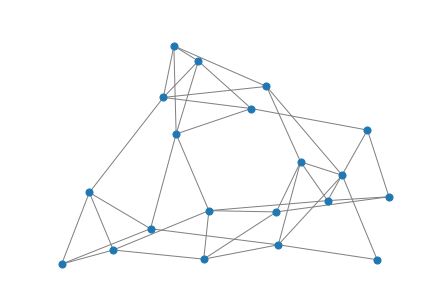

In [36]:
graph = nx.watts_strogatz_graph(n = 20, k = 5, p= 0.2)
draw_graph(graph)

In [37]:
n = 1E5
bag = nx.extended_barabasi_albert_graph(n,m=1,p=0,q=0)

<hr/>

<b>Aim</b>: Import network data from network repository 

<hr/>

In [47]:
adjMatrix = mmread("../Data/AstroPhysicsNetwork/ca-AstroPh.mtx")
graph = nx.from_scipy_sparse_matrix(adjMatrix)

In [63]:
degrees = dict(nx.degree(graph))
ci = nx.clustering(graph)
centrality = nx.centrality.eigenvector_centrality(graph)

In [68]:
stats = pd.DataFrame({
    "centrality": centrality,
    "C_i": ci,
    "degree": degrees
})

In [69]:
neighbors = [n for n in nx.neighbors(graph, 6933)]

sampling = 0.1
nTop = round(len(neighbors)*sampling)

In [70]:

idx = {
    "random": stats.loc[neighbors].sort_index().index[:nTop], 
    "centrality": stats.loc[neighbors].sort_values("centrality", ascending=False).index[:nTop],
    "C_i": stats.loc[neighbors].sort_values("C_i", ascending=False).index[:nTop]
}

In [71]:
def plotSubgraph(graph, indices, center = 6933):
    draw_graph(
        nx.subgraph(graph, list(indices) + [center]),
        layout = nx.kamada_kawai_layout
    )

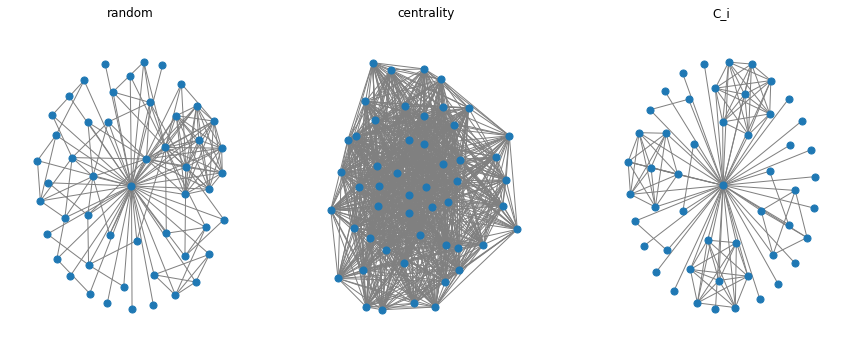

In [72]:
plt.figure(figsize=(15,6))
for ith, title in enumerate(["random", "centrality", "C_i"]):
    plt.subplot(1,3,ith+1)
    plotSubgraph(graph, idx[title])
    plt.title(title)

In [77]:
graph = LoadEdgeList(PNGraph, "../Data/AmazonData/com-amazon.ungraph.txt", 0, 1, '\t')

In [78]:
#